# RFSoC SDR

## An RFSOC SDR PLATEFORM
In this nootbook we will discover 2 demonstratinos of how to use the platform\
The platform consists of 5 DACs and 1 ADC, fully configurable.

In [1]:
from sdr_overlay import SdrOverlay

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data import LPF, plot_fft, sin_gen, concat, plot_32bits, plot_scatter
from time import sleep
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import scipy

It all starts with the instantiation of the SdrOverlay class.

In [3]:
sdr = SdrOverlay("overlay/design_1.bit", Fs_dac_tile_0 = 4096, Fs_dac_tile_1 = 4096, Fs_adc_tile_0 = 4096)

Design loaded (status) :  True


In [4]:
sdr.info()

Class : Vsg7Overlay
	DACs Info :
	TILE 0: 
		DAC 00 : BRAM(0) 1M
		DAC 01 : BRAM(1) 1M
		DAC 02 : URAM(1) 512k
	TILE 1
		DAC 12 : DDR4(0) 4G
		DAC 13 : URAM(0) 2M
	ADCs Info :
	TILE 0: 
		ADC 00 : BRAM(0) 1M


Configuration :

DACs :
	Tile 0 PLL Config :  {'Enabled': 1, 'RefClkFreq': 409.6, 'SampleRate': 4.096, 'RefClkDivider': 1, 'FeedbackDivider': 30, 'OutputDivider': 3, 'FractionalMode': 0, 'FractionalData': 0, 'FractWidth': 0}
	Tile 1 PLL Config :  {'Enabled': 1, 'RefClkFreq': 409.6, 'SampleRate': 4.096, 'RefClkDivider': 1, 'FeedbackDivider': 30, 'OutputDivider': 3, 'FractionalMode': 0, 'FractionalData': 0, 'FractWidth': 0}
Mixer Config : 
	DAC 00 : {'Freq': -1500.0, 'PhaseOffset': 0.0, 'EventSource': 2, 'CoarseMixFreq': 0, 'MixerMode': 2, 'FineMixerScale': 0, 'MixerType': 2}
	DAC 01 : {'Freq': -1500.0, 'PhaseOffset': 0.0, 'EventSource': 2, 'CoarseMixFreq': 0, 'MixerMode': 2, 'FineMixerScale': 0, 'MixerType': 2}
	DAC 02 : {'Freq': -1500.0, 'PhaseOffset': 0.0, 'EventSource': 2, 'Coa

***

## Sinus demonstration
Let's start with something very simple, by generating a sinusoid (The design was mainly designed for complex signals, but it is possible to make real signals although there are more restrictions). To begin with, you absolutely must connect the DAC00 to the ADC00, and you can use an oscilloscope or Spectrum Analyzer to test the other DACs.

(If you are only interesting on digital communication you can jump to the next section)

In [5]:
f = 100e6

Fs = 6144e6

data_adc = sdr.demo_sin(f = f, Fs = Fs, capture_size = 150_000)

PLL DACs = 6144.0 MHz
PLL ADC = 4096 MHz
Tile : 0 is now in Real Mode (Mixer = Bypass, Interpolation = 1)
Tile : 1 is now in Real Mode (Mixer = Bypass, Interpolation = 1)
SIN GEN :
	Number of 16 bits samples (N) = 248832, number of periods for the sinus = 4050
	Memory Usage : 0.497664 Mbytes


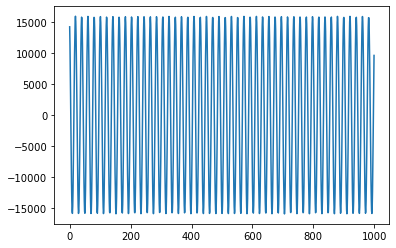

In [6]:
plt.plot(data_adc[0:1000])
plt.show()

This example shows that it's possible to send real signals, but the platform was mainly designed for use as a complex for communication signals, so let's take a look at it.

***

## QAM Loopback Demonstration

I have chosen QAM modulation and will use one DAC00 and one ADC00 to create a complete chain with transmission and reception. To do this, DAC00 must be connected to ADC00, creating a configuration that we will call Loopback

We will explore all the step of modulation and demodulation in an interactive way with Numpy, Scipy, Commpy, Matplotlib, Plotly.

## Modulation

In [5]:
# Some function for plotting
def plotly_fft(freq, fft, div, title="", save_name = None):
    #ticks = np.arange(-2000, 2001, 400)
    fig = go.Figure()
   
    fig.add_trace(go.Scatter(
        x=freq[::div],
        y=np.abs(fft[::div]),
        mode="lines",
        line=dict(width = 1, color = 'black')
    ))

    fig.update_layout(
        height = 400,
        width = 700,
        title=title,
        xaxis_title="Frequency (MHz)",
        yaxis_title="|Amplitude|",
        plot_bgcolor='white',  # Fond blanc
        font=dict(color='black', family='Arial', size=15),  # Police noire
        title_font=dict(size=20, family='Arial', color='black'),
        xaxis=dict(
            # tickvals=ticks,
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='lightgrey',
        ),
        yaxis=dict(
            type="log",
            mirror=True,
            ticks='outside',
            showline=True,
            linecolor='black',
            gridcolor='lightgrey'
           
        )
    )
    fig.show()
    if save_name != None:
        fig.write_image(save_name)
       

In [6]:
def plotly_constellation(data):
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=np.real(data),
        y=np.imag(data),
        mode='markers',
        name='Final constellation (after normalization)',
        marker=dict(size=6, color='black')
    ))
    fig.update_yaxes(
        title_text='Q',
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey',
        title_font=dict(size=20, family='Arial', color='black')
    )
    fig.update_xaxes(
        title_text='I',
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey',
        title_font=dict(size=20, family='Arial', color='black')
    )
    fig.update_layout(
        plot_bgcolor='white',
        height=700,
        width=700,
        title_font=dict(size=20, family='Arial'),
        legend=dict(
            x=0.5,
            y=-0.2,
            orientation='h',
            xanchor='center',
            yanchor='top',
            font=dict(size=35, family='Arial', color='black')
        )
    )
    fig.show()

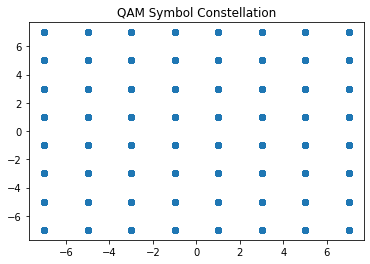

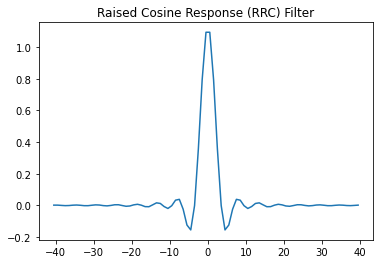

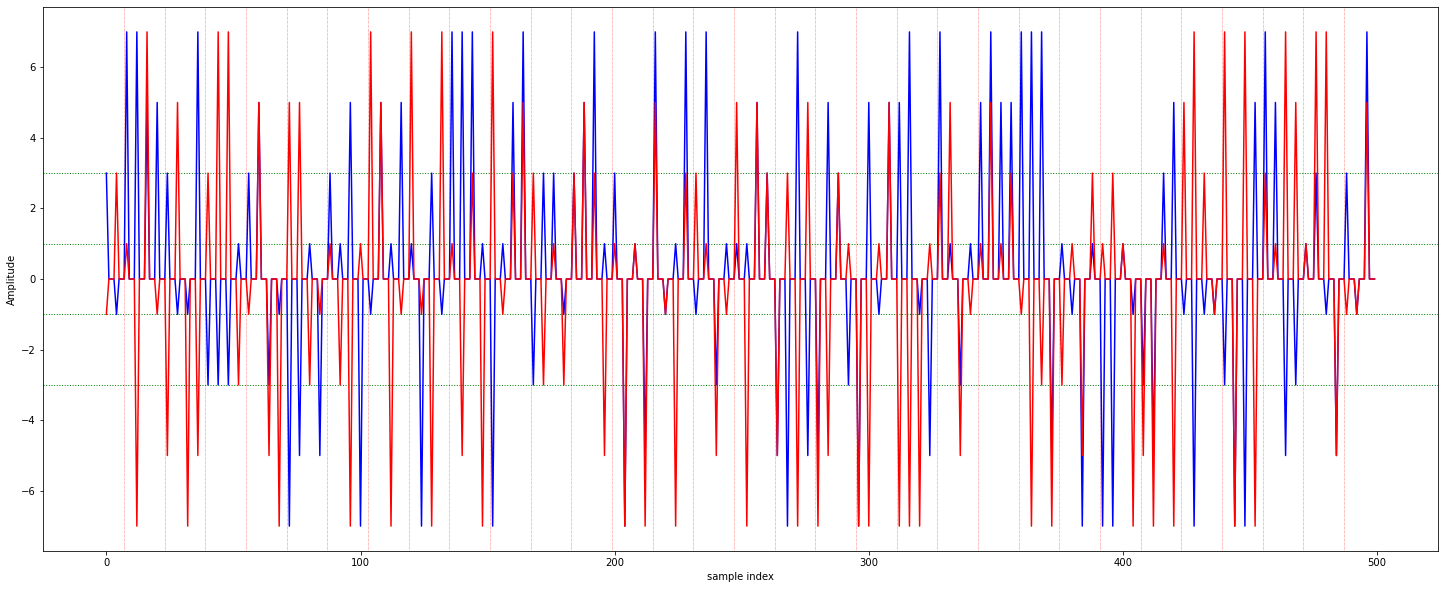

After filtering


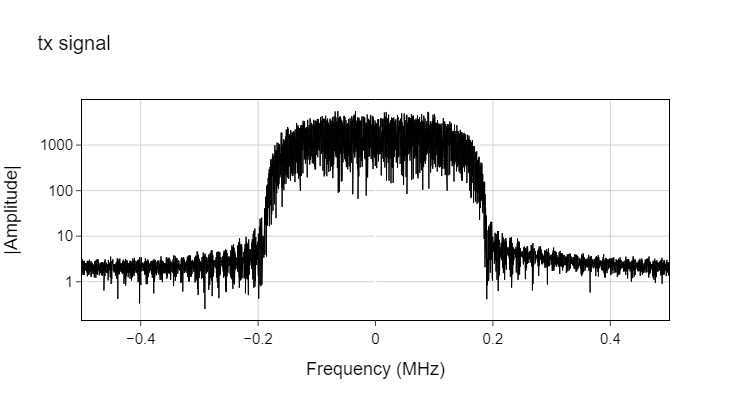

In [47]:
import commpy as cp

Fs = 4096
N=6400 # Number of Symbols
mod_order=64
samples_per_symbol=4
rolloff_factor=0.5
filter_span=20

# You can choose to plot the first steps of the modulations
plot=True

symbol_rate = 1 # No need to choose the Symbol rate at this point
num_taps = filter_span * samples_per_symbol + 1

# Generation of bits and QAM symbols
bits = np.random.randint(0, 2, int(N * np.log2(mod_order)))
# I use Commpy to generate random symbols
QAMModem = cp.modulation.QAMModem(mod_order)
symbols = QAMModem.modulate(bits) 

if (plot):
    plt.scatter(np.real(symbols), np.imag(symbols))
    plt.title("QAM Symbol Constellation")
    plt.show()

# Design of the RRC filter
time_idx, rrc_filter = cp.filters.rrcosfilter(num_taps, rolloff_factor, samples_per_symbol, symbol_rate)

if (plot):
    plt.plot(time_idx, rrc_filter)
    plt.title("Raised Cosine Response (RRC) Filter")
    plt.show()

# Upsampling of symbols
upsampled_symbols = np.zeros(N * samples_per_symbol, dtype=complex)
upsampled_symbols[::samples_per_symbol] = symbols

if (plot):
    sig = upsampled_symbols
    plt.figure(figsize=(25, 10))
    end = 500
    offset = 7
    for i in range(offset, end, 16):
        plt.axvline(x=i, color='r', linestyle=':', linewidth=0.5)

    plt.axhline(y=3, color='g', linestyle=':', linewidth=1)
    plt.axhline(y=-3, color='g', linestyle=':', linewidth=1)
    plt.axhline(y=1, color='g', linestyle=':', linewidth=1)
    plt.axhline(y=-1, color='g', linestyle=':', linewidth=1)
    plt.plot(np.real(sig[:end]), 'b')
    plt.plot(np.imag(sig[:end]), 'r')
    plt.ylabel("Amplitude")
    plt.xlabel("sample index")
    # plt.grid()
    # plt.legend()
    plt.show()
    

# Filtering the upsampled signal
filtered_signal = np.convolve(upsampled_symbols, rrc_filter, 'same')

if (plot):
    print("After filtering")
    plotly_fft(
        freq = np.linspace(-1/2, 1/2, filtered_signal.size),
        fft=np.fft.fftshift(np.fft.fft(filtered_signal)),
        div = 2,
        title="tx signal",
        save_name = None
    )


# You can save the signal that will be sent to the PL as a .csv file.  
# np.savetxt("data_dac.csv", filtered_signal)
    
# Normalization and conversion
factor = 32767 / np.max(np.abs(filtered_signal))
IQ_signal = filtered_signal * factor
I_signal = IQ_signal.real.astype(np.int16)
Q_signal = IQ_signal.imag.astype(np.int16)


data_dac = np.zeros(int(I_signal.size), dtype=np.int32)
for n in range(I_signal.size):
    data_dac[n] = ((I_signal[n] << 16) & 0xFFFF_0000) | ((Q_signal[n]) & 0x0000_FFFF)

# At this stage 'data_dac' is ready for the DAC

In [48]:
save = False
name = "dac_64qam_2sps.csv"
if save:
    np.savetxt(name, filtered_signal)

In [49]:
print(factor)

2585.5282844066865


### Data Converter Settings

In [50]:
# Sampling rate = 4096 MHz
sdr.set_all_pll(Fs = 4096)
# You can used set_dac_tile_pll(self, tile, Fs = 6144), set_adc_tile_pll(self, tile = 0, Fs = 4096) to set the pll as well
sdr.update_all_mixer()

In [51]:
# Data converters Settings
# This two methods set the DAC in IQ->Real Mode and the ADC in Real->IQ Mode and set the mixers settings at the same time
nco_freq = 1024
sdr.set_dac_tile_IQ(tile = 0, interpolation_factor = 2, nco_freq = nco_freq, nz = 1)
sdr.set_adc_tile_IQ(decimation_factor = 2, nco_freq = nco_freq, nz = 1)

DAC:

In [52]:
# Fill the DAC Driver
sdr.load_data(tile = 0, dac = 0, data = data_dac)
sdr.load_data(tile = 0, dac = 1, data = data_dac) # You can used the DAC01 to debug with a VSA ;)


# We send and capture the data in 32-bit packets as far as converters are concerned, 
# a sample is 16 bits, so the reference value I use to define the signal size is the number of 32-bit samples, 
# i.e. 2*16 bits, which corresponds to an IQ sample.
sdr.set_dac_controller(tile = 0, dac = 0, number_of_32bits_samples=data_dac.size)
sdr.set_dac_controller(tile = 0, dac = 1, number_of_32bits_samples=data_dac.size)

ADC:

In [53]:
# Catpure the output of the adc
sleep(1)
number_of_32bits_samples = data_dac.size
sdr.adc_capture(number_of_32bits_samples=number_of_32bits_samples)
sleep(2)
data_adc = sdr.get_data(number_of_32_bits_samples=number_of_32bits_samples, mode="IQ") # Data is the baseband signal output by the DAC after downconvert

You can choose to save 'data adc' to demodulate in another computer for example (or/and with matlab)

In [54]:
# You can save the ADC output in a .csv file.
save_adc = False
name = "adc_64qam_2sps.csv"
if save_adc:
    np.savetxt(name, data_adc)

# If you want to read the csv easily :
# test = np.loadtxt("data_adc.csv", dtype=complex128)

### Demodulation

In [58]:
print("sps=", samples_per_symbol)

sps= 4


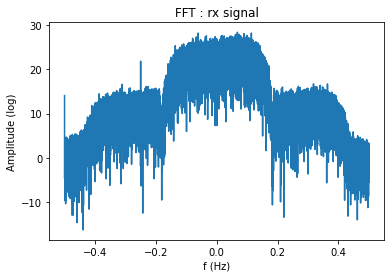

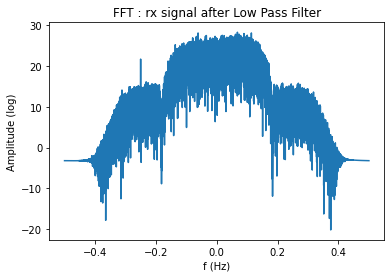

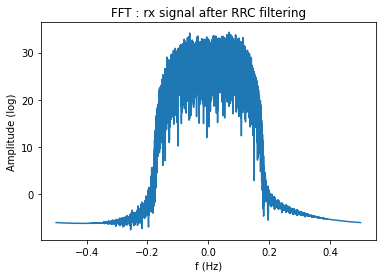

In [59]:
signal_rx = data_adc / factor # I use the normalization factor to get a better scale
plot_fft(signal_rx, Fs = 1, title = "FFT : rx signal")

# If you want you can add a Low Pass Filter
lpf = True 
if (lpf):
    signal_rx, _, _ = LPF(signal_rx, 0.3, 1)
    plot_fft(signal_rx, Fs = 1, title = "FFT : rx signal after Low Pass Filter")
    
# We do a second time the RRC filter in our signal
signal_rx = np.convolve(signal_rx, rrc_filter, "same")
plot_fft(signal_rx, Fs = 1, title = "FFT : rx signal after RRC filtering")

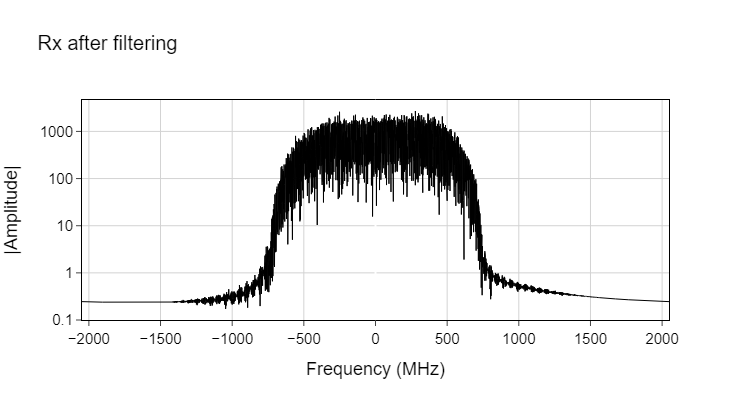

In [60]:
Fs = 4096
freq = np.linspace(-Fs/2, Fs/2, signal_rx.size)
fft = np.fft.fftshift(np.fft.fft(signal_rx))
div = 1
title="" 
save_name = None # "qam64_rx_filter.svg"
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=freq[::div],
    y=np.abs(fft[::div]),
    mode="lines",
    line=dict(width = 1, color = 'black')
))

fig.update_layout(
    height = 400,
    width = 700,
    title="Rx after filtering",
    xaxis_title="Frequency (MHz)",
    yaxis_title="|Amplitude|",
    plot_bgcolor='white',  # Fond blanc
    font=dict(color='black', family='Arial', size=15),  # Police noire
    title_font=dict(size=20, family='Arial', color='black'),
    xaxis=dict(
        # tickvals=ticks,
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey',
    ),
    yaxis=dict(
        type="log",
        mirror=True,
        ticks='outside',
        showline=True,
        linecolor='black',
        gridcolor='lightgrey'

    )
)
fig.show()
if save_name != None:
    fig.write_image(save_name)

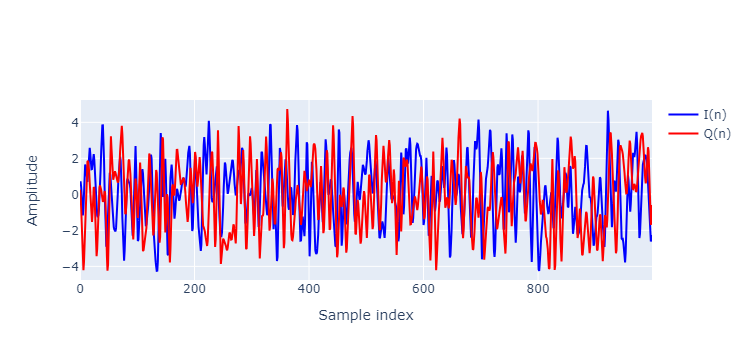

In [61]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=np.real(signal_rx[:1000]), mode='lines', line=dict(color='blue'), name='I(n)'))
fig.add_trace(go.Scatter(y=np.imag(signal_rx[:1000]), mode='lines', line=dict(color='red'), name='Q(n)'))

# Mise à jour des axes et du layout
fig.update_layout(
    title="",
    xaxis_title="Sample index",
    yaxis_title="Amplitude",

)

fig.show()

In [64]:
samples_per_symbol = 4 ################## DON'T FORGET TO CHANGE THIS ONE ALSO ##################
rp = True
if rp:
    rp_up = 8
    signal_rx_rp = scipy.signal.resample_poly(signal_rx, rp_up, 1)
    samples_per_symbol = samples_per_symbol * rp_up
    print("sps = ", samples_per_symbol)

sps =  32


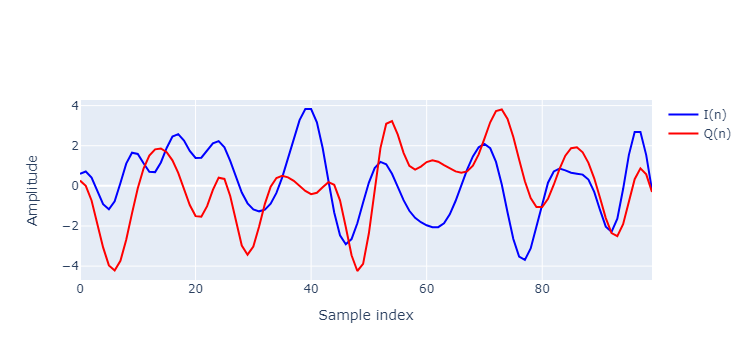

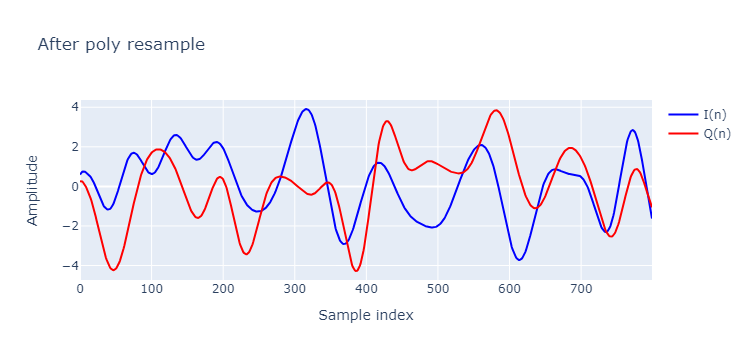

In [65]:
fig = go.Figure()

fig.add_trace(go.Scatter(y=np.real(signal_rx[:100]), mode='lines', line=dict(color='blue'), name='I(n)'))
fig.add_trace(go.Scatter(y=np.imag(signal_rx[:100]), mode='lines', line=dict(color='red'), name='Q(n)'))

# Mise à jour des axes et du layout
fig.update_layout(
    title="",
    xaxis_title="Sample index",
    yaxis_title="Amplitude",

)


fig.show()
if rp:

    fig = go.Figure()

    fig.add_trace(go.Scatter(y=np.real(signal_rx_rp[:int(100*rp_up)]), mode='lines', line=dict(color='blue'), name='I(n)'))
    fig.add_trace(go.Scatter(y=np.imag(signal_rx_rp[:int(100*rp_up)]), mode='lines', line=dict(color='red'), name='Q(n)'))

    # Mise à jour des axes et du layout
    fig.update_layout(
        title="After poly resample",
        xaxis_title="Sample index",
        yaxis_title="Amplitude",

    )

    fig.show()

At this stage, we still need to correct the phase/rotation added by the channel, as well as find the normalization factor to recover a constellation similar to the one previously created. But first we need to downsample the signal and find the good offset.

I choose to do it manualy in an interactive way :

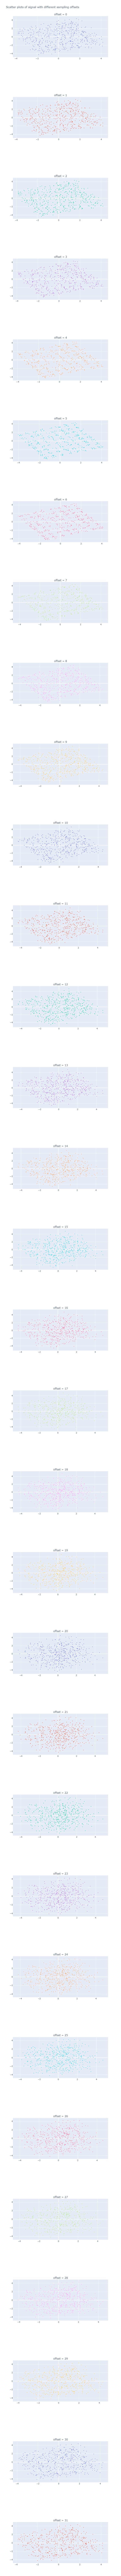

In [66]:
# I will used plotty fot the futur plot allowing measurement directly in jupyter

end = 500*samples_per_symbol # To reduce the plotting time (all the graph bellow will use sig !!)
if rp:
    sig = signal_rx_rp[0:end]
else:
    sig = signal_rx[0:end]

fig = make_subplots(rows=samples_per_symbol, cols=1, subplot_titles=[f"offset = {i}" for i in range(samples_per_symbol)])

for sampling_offset in range(samples_per_symbol):
    sig_d = sig[sampling_offset::samples_per_symbol]
    fig.add_trace(
        go.Scatter(x=np.real(sig_d), y=np.imag(sig_d), mode='markers', marker=dict(size=3)),
        row=sampling_offset+1, col=1
    )

fig.update_layout(
    height=samples_per_symbol*500,
    width=400,
    title_text="Scatter plots of signal with different sampling offsets",
    showlegend=False
)

fig.show()



At this point you should be able to choose the good sampling offset and rotation degree to add :

In [79]:
# You can choose the offset and the rotation (degres) thank to the Figure above
offset = 5
rotation = -28

You can run the 2 cells bellow to check your settings

In [80]:
theta_radians = np.deg2rad(rotation)
sig_rot = sig * np.exp(1j * theta_radians)

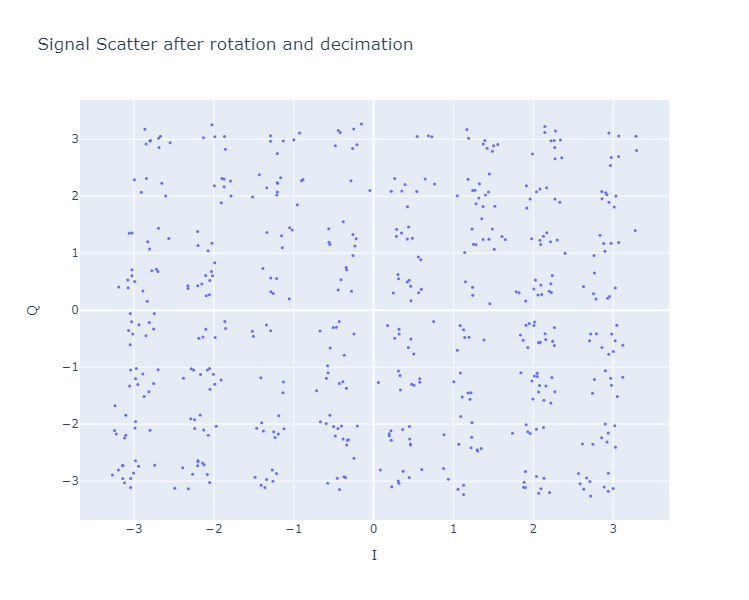

In [81]:
# Signal Downsampling
sig_d = sig_rot[offset::samples_per_symbol]

fig = go.Figure()
fig.add_trace(go.Scatter(x=np.real(sig_d), y=np.imag(sig_d), mode='markers', marker=dict(size=3)))
fig.update_layout(
    title="Signal Scatter after rotation and decimation",
    xaxis_title="I",
    yaxis_title="Q",
    height=600,
    width=600
)
fig.show()

Now you will have to find the good normalization factor :

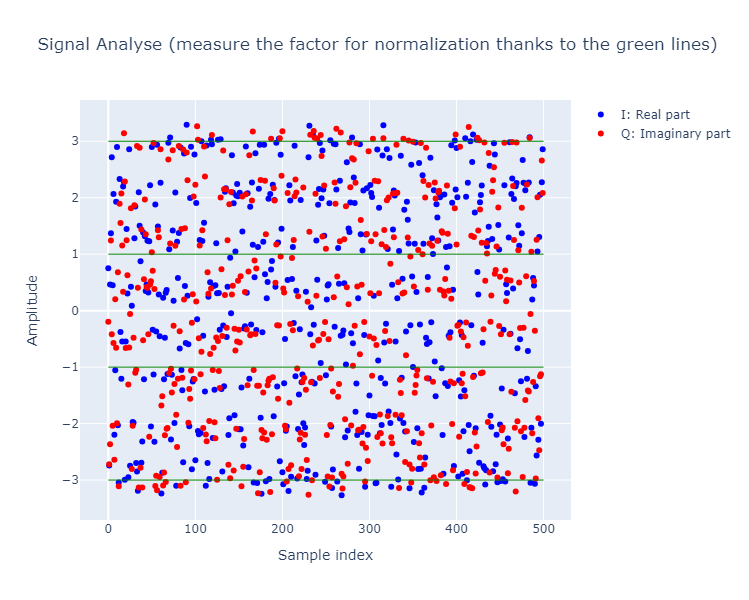

In [82]:
fig = go.Figure()

for y in [3, -3, 1, -1]:
    fig.add_shape(type='line', x0=0, y0=y, x1=sig_d.size, y1=y,
                  line=dict(color='green', width=1))

fig.add_trace(go.Scatter(y=np.real(sig_d), mode='markers', line=dict(color='blue'), name='I: Real part'))
fig.add_trace(go.Scatter(y=np.imag(sig_d), mode='markers', line=dict(color='red'), name='Q: Imaginary part'))

# Mise à jour des axes et du layout
fig.update_layout(
    title="Signal Analyse (measure the factor for normalization thanks to the green lines)",
    xaxis_title="Sample index",
    yaxis_title="Amplitude",
    height=600,
    width=1250
)

fig.show()

In [83]:
# You can measure the max_measure thanks to the graph above
measure = 6.3

expected_measure = 7
sig_normalized =(expected_measure/measure) * sig_d

You can run the cell bellow to check your settings

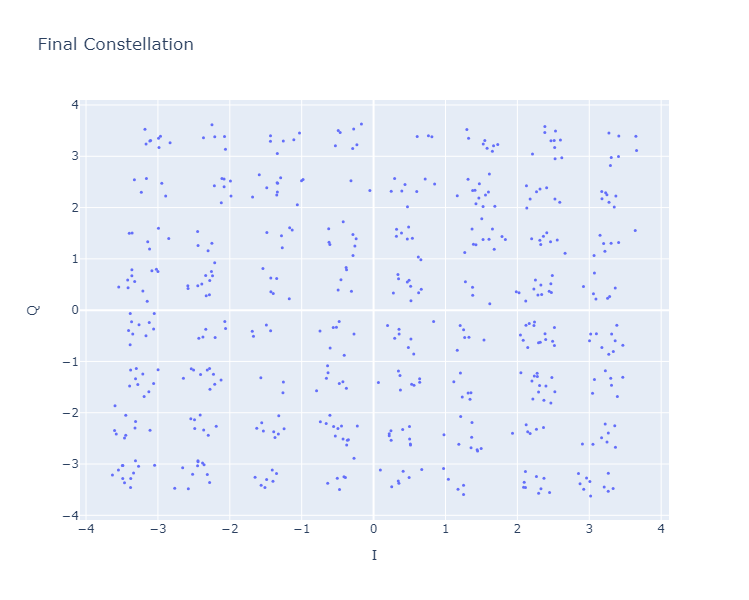

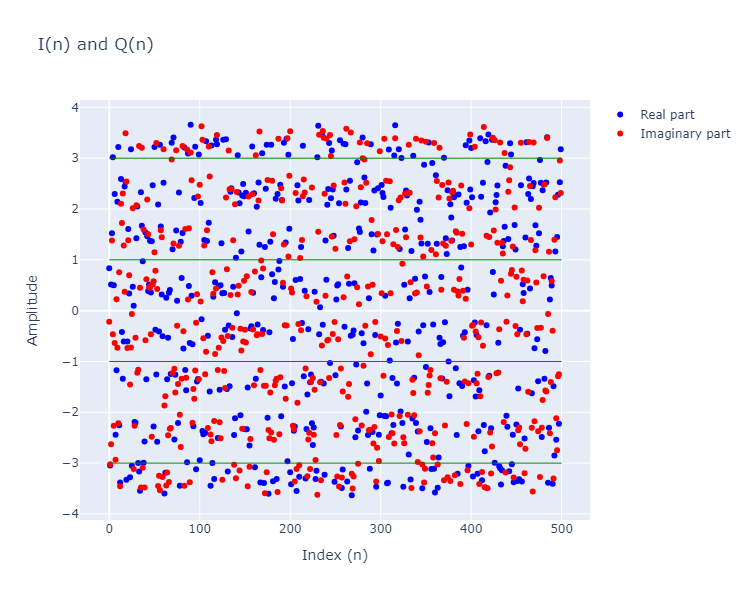

In [84]:
# Création de la figure
fig = go.Figure()

# Ajout des courbes pour la partie réelle et imaginaire du signal
fig.add_trace(go.Scatter(x=np.real(sig_normalized), y=np.imag(sig_normalized), mode='markers', marker=dict(size=3)))

# Mise à jour des axes et du layout
fig.update_layout(
    title="Final Constellation",
    xaxis_title="I",
    yaxis_title="Q",
    height=600,
    width=600
)

fig.show()

#
fig = go.Figure()


# Ajout des lignes horizontales vertes
for y in [3, -3, 1, -1]:
    fig.add_shape(type='line', x0=0, y0=y, x1=sig_d.size, y1=y,
                  line=dict(color='green', width=1))

fig.add_trace(go.Scatter(y=np.real(sig_normalized), mode='markers', line=dict(color='blue'), name='Real part'))
fig.add_trace(go.Scatter(y=np.imag(sig_normalized), mode='markers', line=dict(color='red'), name='Imaginary part'))

# Mise à jour des axes et du layout
fig.update_layout(
    title="I(n) and Q(n)",
    xaxis_title="Index (n)",
    yaxis_title="Amplitude",
    height=600,
    width=1250
)

fig.show()

In [85]:
# We finally apply all the step in all the signal not just a subset
if rp:
    signal_rx_rot = signal_rx_rp * np.exp(1j * theta_radians)
else:
    signal_rx_rot = signal_rx * np.exp(1j * theta_radians)
signal_rx_d = signal_rx_rot[offset::samples_per_symbol]
signal_rx_normalized =(expected_measure/measure) * signal_rx_d
# print(signal_rx_normalized.size, "symbols read")

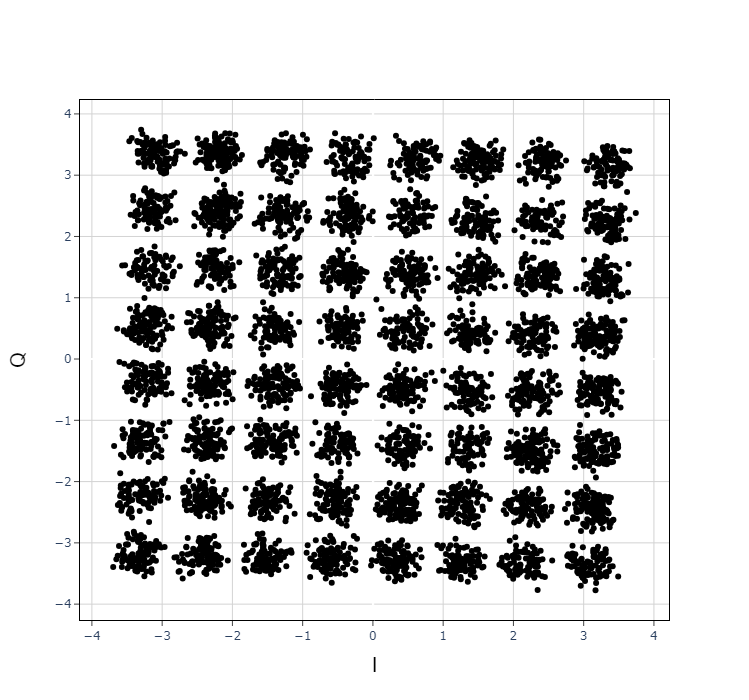

In [86]:
# And you can plot your work
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=np.real(signal_rx_normalized),
    y=np.imag(signal_rx_normalized),
    mode='markers',
    name='Final constellation (after normalization)',
    marker=dict(size=6, color='black')
))
fig.update_yaxes(
    title_text='Q',
    mirror=True,
    ticks='outside',
    dtick=1,
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title_font=dict(size=20, family='Arial', color='black')
)
fig.update_xaxes(
    title_text='I',
    mirror=True,
    ticks='outside',
    dtick=1,
    showline=True,
    linecolor='black',
    gridcolor='lightgrey',
    title_font=dict(size=20, family='Arial', color='black')
)
fig.update_layout(
    plot_bgcolor='white',
    height=700,
    width=700,
    title_font=dict(size=20, family='Arial', color='black'),
    legend=dict(
        x=0.5,
        y=-0.2,
        orientation='h',
        xanchor='center',
        yanchor='top',
        font=dict(size=35, family='Times New Roman', color='black')
    )
)
fig.show()

fig.write_image("qam64.svg")



### Congrats !! You have your constellation, you should see a QAM 

You have succesfully modulate and demodulate a signal (random bits) in a 16-QAM using 1 DAC and 1 ADC